# PhD Retreat 2024: Dynamical Systems Workshop
## Part B: Coupled swing equations

Here, we consider a 6 machine power system. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from source.coupled_swing_systems import GeneralModel
import networkx as nx
N = 6 
# Model parameters
M = M = 0.02; D = 20; P = 5; K = 400.0

Ms = np.ones(N) * M; Ds = np.ones(N) * D; Ps = np.array([2.0, 1.0, 1.0, -1.0, -1.0, -2.0]) * P
Kmatrix = np.array([[0.0, 1.0, 1.0, 0.0, 0.0, 0.0], 
                    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
                    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0], 
                    [0.0, 0.0, 1.0, 0.0, 1.0, 1.0], 
                    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0], 
                    [0.0, 0.0, 0.0, 1.0, 1.0, 0.0]]) * K


The next cell visualises the network with the NetworkX package. 

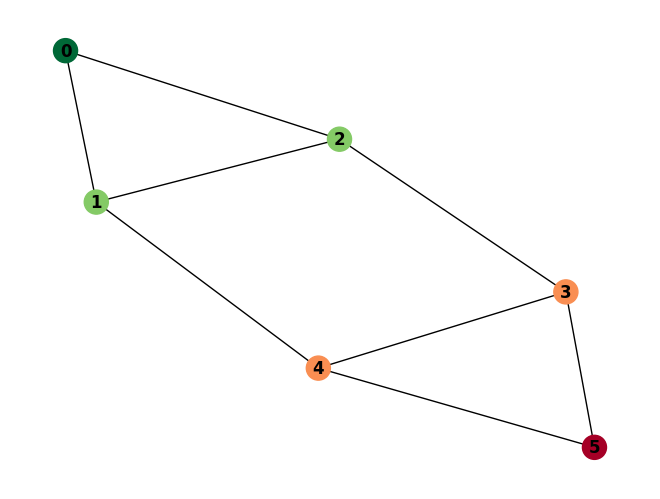

In [10]:
# Create graph instance from coupling matrix
graph = nx.Graph(Kmatrix)
# visualise the graph with colors according to P (green to red)
nx.draw(graph, with_labels=True, font_weight='bold', node_color=Ps, cmap=plt.cm.RdYlGn)

In [11]:
# Simulation parameters
t_span = (0.0, 2.0) # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 3000)


### Exercise 1a : Find the synchronous steady state 

In [12]:
u_init = np.concatenate((np.zeros(N), np.zeros(N))) # initial conditions

# Problem definition
problem = GeneralModel(Ms, Ds, Ps, Kmatrix) # define ode problem
# Integration
solution = solve_ivp(problem, t_span, u_init, t_eval=t_eval);

phis: [0. 0. 0. 0. 0. 0.]
domegas: [ 500.  250.  250. -250. -250. -500.]
domegas.shape: (6,)
phis: [0. 0. 0. 0. 0. 0.]
domegas: [ 499.5   249.75  249.75 -249.75 -249.75 -499.5 ]
domegas.shape: (6,)
phis: [0. 0. 0. 0. 0. 0.]
domegas: [ 490.  245.  245. -245. -245. -490.]
domegas.shape: (6,)
phis: [ 2.250e-07  1.125e-07  1.125e-07 -1.125e-07 -1.125e-07 -2.250e-07]
domegas: [ 485.2295   242.61475  242.61475 -242.61475 -242.61475 -485.2295 ]
domegas.shape: (6,)
phis: [ 1.52e-06  7.60e-07  7.60e-07 -7.60e-07 -7.60e-07 -1.52e-06]
domegas: [ 461.5488  230.7744  230.7744 -230.7744 -230.7744 -461.5488]
domegas.shape: (6,)
phis: [ 1.79845004e-06  8.99225021e-07  8.99225021e-07 -8.99225021e-07
 -8.99225021e-07 -1.79845004e-06]
domegas: [ 457.38643836  228.69321918  228.69321918 -228.69321918 -228.69321918
 -457.38643836]
domegas.shape: (6,)
phis: [ 2.30642836e-06  1.15321418e-06  1.15321418e-06 -1.15321418e-06
 -1.15321418e-06 -2.30642836e-06]
domegas: [ 452.34868654  226.17434327  226.17434327 -

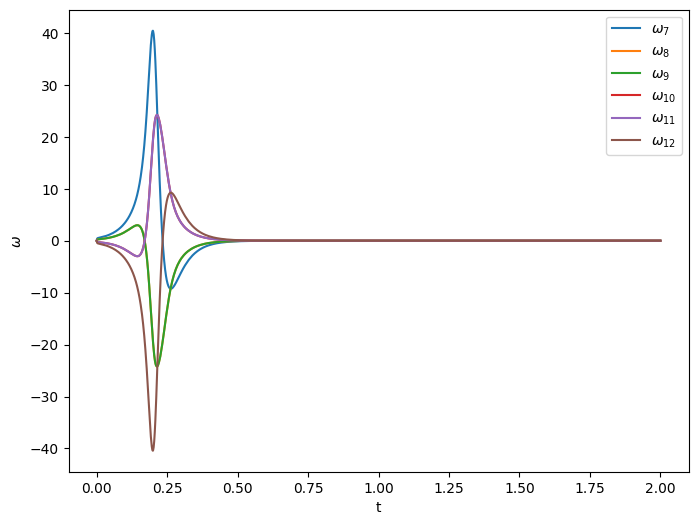

In [13]:
# Plot the frequencies
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(6, 12):
    ax.plot(solution.t, solution.y[i, :], label=r'$\omega_{{{:2d}}}$'.format(i+1))
ax.set_xlabel(r't')
ax.set_ylabel(r'$\omega$')
ax.legend()
plt.show()

In [14]:
u_eq = solution.y[:, -1]

### Exercise 2: Perturb the system

In [15]:
# Change the coupling matrix at a certain time
events = []
events.append({'time': 0.5, 'Ps': np.array([0.0, 1.0, 1.0, 1.0, -1.0, -2.0]) * P}) 

# Integration
problem = GeneralModel(Ms, Ds, Ps, Kmatrix, events=events) # define ode problem
solution = solve_ivp(problem, t_span, u_eq, t_eval=t_eval);


phis: [ 1.59579795 -1.55829502 -1.55829502  1.55829502  1.55829502 -1.59579795]
domegas: [-1.88001456e-04 -9.40154369e-05 -9.40154369e-05  9.40154369e-05
  9.40154369e-05  1.88001456e-04]
domegas.shape: (6,)
phis: [ 1.59579797 -1.55829502 -1.55829502  1.55829502  1.55829502 -1.59579797]
domegas: [ 0.01365814  0.00683014  0.00683014 -0.00683014 -0.00683014 -0.01365814]
domegas.shape: (6,)
phis: [ 1.59579796 -1.55829502 -1.55829502  1.55829502  1.55829502 -1.59579796]
domegas: [ 0.00130276  0.00065148  0.00065148 -0.00065148 -0.00065148 -0.00130276]
domegas.shape: (6,)
phis: [ 1.59579794 -1.55829503 -1.55829503  1.55829503  1.55829503 -1.59579794]
domegas: [-0.01125056 -0.00562616 -0.00562616  0.00562616  0.00562616  0.01125056]
domegas.shape: (6,)
phis: [ 1.59579982 -1.55829409 -1.55829409  1.55829409  1.55829409 -1.59579982]
domegas: [ 1.78591986  0.89309964  0.89309964 -0.89309964 -0.89309964 -1.78591986]
domegas.shape: (6,)
phis: [ 1.59582463 -1.55828169 -1.55828169  1.55828169  1.55

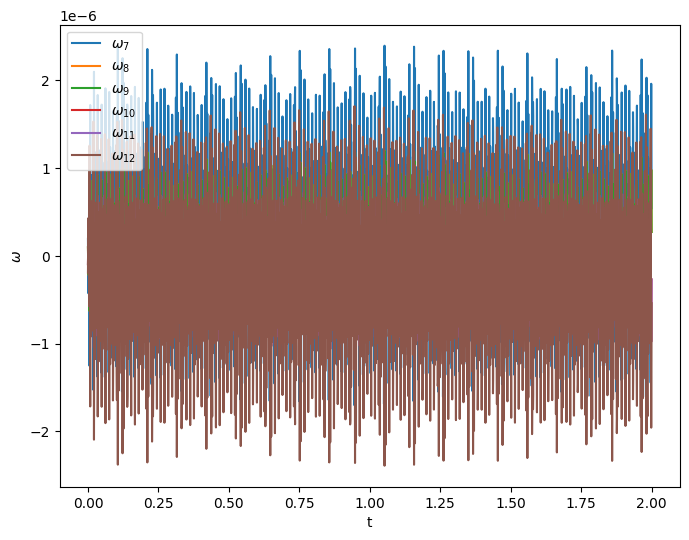

In [16]:
# Plot the frequencies
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(6, 12):
    ax.plot(solution.t, solution.y[i, :], label=r'$\omega_{{{:2d}}}$'.format(i+1))
ax.set_xlabel(r't')
ax.set_ylabel(r'$\omega$')
ax.legend()
plt.show()

### Exercise 2: Determine the eigenvalues of the linearised system 

In [28]:
from numpy.linalg import eig

# Jacobian matrix

